In [14]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

In [15]:
#Importando os arquivos do diretorio database
redMulletImages = os.listdir('./database/RedMullet')
shrimpImages = os.listdir('./database/Shrimp')

In [16]:
#Criando uma lista com todas as imagens
for index, i in enumerate(redMulletImages):
    redMulletImages[index] = './database/RedMullet/' + i    
for index, i in enumerate(shrimpImages):
    shrimpImages[index] = './database/Shrimp/' + i    
    

In [17]:
#Abrindo as imagens

np.array(Image.open(redMulletImages[0]))
shrimpArray = [np.array(Image.open(image)) for image in shrimpImages]
redMulletArray = [np.array(Image.open(image)) for image in redMulletImages]

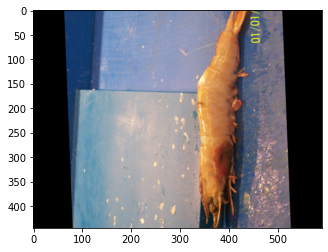

In [18]:
#Exemplo de foto da base
plt.imshow(shrimpArray[0])

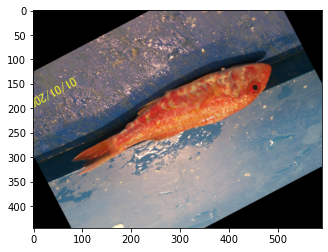

In [19]:
#Exemplo de foto da base
plt.imshow(redMulletArray[0])

In [20]:
#Colocando as imagens em um array de tamanhos padronizados
for index, image in enumerate(shrimpArray):
    shrimpArray[index] = shrimpArray[index].reshape(445,590,3,1)
for index, image in enumerate(redMulletArray):
    redMulletArray[index] = redMulletArray[index].reshape(445,590,3,1)


In [21]:
#Separando os dados em treinamento e teste
x_train = np.concatenate((shrimpArray[:600], redMulletArray[:600]), axis=0)
y_train = np.concatenate((np.ones(600), np.zeros(600)), axis=0)
x_test = np.concatenate((shrimpArray[600:], redMulletArray[600:]), axis=0)
y_test = np.concatenate((np.ones(400), np.zeros(400)), axis=0)

In [22]:
#Adicionando uma camada de convolução
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(filters=5, kernel_size=(3,3,1), input_shape=shrimpArray[0].shape, activation='relu'))
model.add(tf.keras.layers.AveragePooling3D())
model.add(tf.keras.layers.Conv3D(filters=4, kernel_size=(3,3,1), input_shape=shrimpArray[0].shape, activation='relu'))
model.add(tf.keras.layers.Flatten())

#Adicionando camadas de classificação
model.add(tf.keras.layers.Dense(units=50, activation='relu'))
model.add(tf.keras.layers.Dense(units=20, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))



In [25]:
#Resumo do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 443, 588, 3, 5)    50        
                                                                 
 average_pooling3d (AverageP  (None, 221, 294, 1, 5)   0         
 ooling3D)                                                       
                                                                 
 conv3d_1 (Conv3D)           (None, 219, 292, 1, 4)    184       
                                                                 
 flatten (Flatten)           (None, 255792)            0         
                                                                 
 dense (Dense)               (None, 50)                12789650  
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                        

In [ ]:
# Compilando o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#Treinando a rede com os dados de treino
model.fit(x_train, y_train, epochs=3, batch_size=32)

Epoch 1/3
38/38 [==============================] - 137s 4s/step - loss: 154.9250 - accuracy: 0.6633
Epoch 2/3
38/38 [==============================] - 132s 3s/step - loss: 0.1571 - accuracy: 0.9792
Epoch 3/3
38/38 [==============================] - 129s 3s/step - loss: 1.8769e-04 - accuracy: 1.0000


In [ ]:
#Calculando a accuracy nos dados de teste
val_loss, val_accuracy = model.evaluate(x_test,y_test)
print(val_loss,val_accuracy)

25/25 [==============================] - 32s 1s/step - loss: 0.0490 - accuracy: 0.9900
0.049020446836948395 0.9900000095367432
